In [1]:
import pandas as pd

In [2]:
raw_data = pd.read_csv('data/tweets.csv', encoding='latin1')
raw_data

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [3]:
raw_data.isnull().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [4]:
raw_data.columns = ['tweet', 'product', 'emotion']

In [5]:
raw_data['product'].value_counts(normalize=True)

iPad                               0.287451
Apple                              0.200851
iPad or iPhone App                 0.142814
Google                             0.130659
iPhone                             0.090246
Other Google product or service    0.089031
Android App                        0.024613
Android                            0.023701
Other Apple product or service     0.010635
Name: product, dtype: float64

In [6]:
raw_data['emotion'].value_counts(normalize=True)

No emotion toward brand or product    0.592654
Positive emotion                      0.327505
Negative emotion                      0.062686
I can't tell                          0.017156
Name: emotion, dtype: float64

In [7]:
raw_data['tweet']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet, Length: 9093, dtype: object

In [8]:
data = raw_data.dropna()
X = data['tweet']
y = data['emotion'].replace({'No emotion toward brand or product':0, 'Positive emotion':1, 'Negative emotion':0, "I can't tell":0})

In [9]:
y.value_counts(normalize=True)

1    0.811911
0    0.188089
Name: emotion, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10151997)

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/czarinaluna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stops = stopwords.words('english') + list(string.punctuation)

In [14]:
vectorizer = TfidfVectorizer(stop_words=stops)

tf_idf_train = vectorizer.fit_transform(X_train)

tf_idf_test = vectorizer.transform(X_test)

In [15]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=10151997)
classifier.fit(tf_idf_train, y_train)
y_preds = classifier.predict(tf_idf_test)

In [16]:
classifier.score(tf_idf_test, y_test)

0.8359659781287971

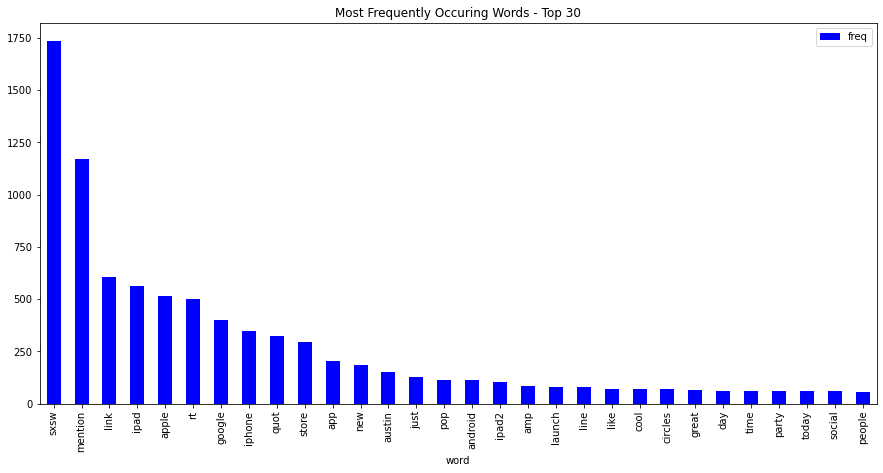

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(X_train)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")
plt.show()

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

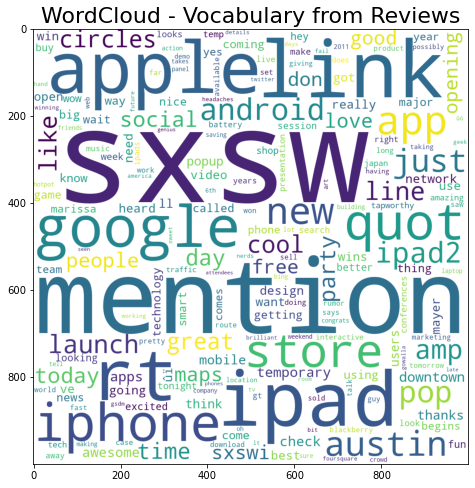

In [119]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [114]:
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [115]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(data['tweet'][data['emotion'] == 'Positive emotion'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(data['tweet'][data['emotion'] == 'Negative emotion'])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

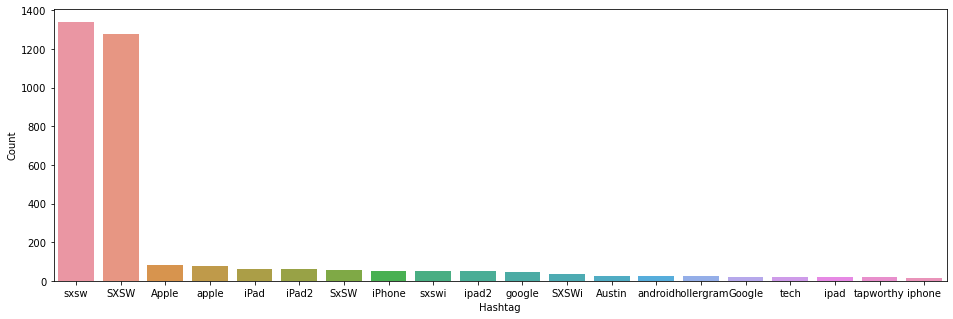

In [117]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n=20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(x="Hashtag", y="Count", data=d)
ax.set(ylabel = 'Count')
plt.show()

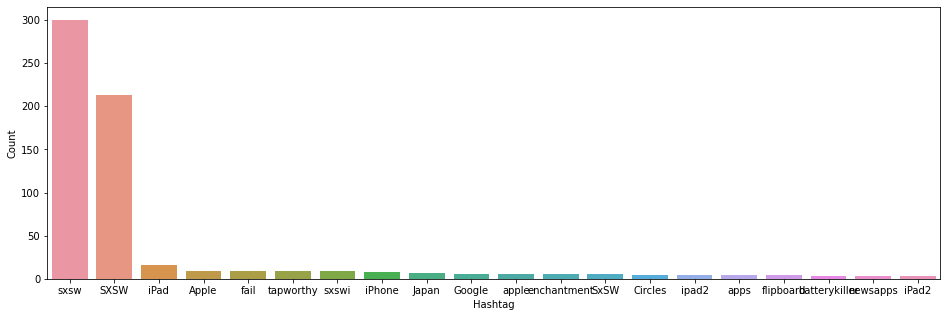

In [118]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})

# selecting top 20 most frequent hashtags     
e = e.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()